# Mushroom Classification (Edible or Poisonous)

### Goal:
Our goal with this project was to compare and analyze how different machine learning algorithms fared when applied to different datasets. For this project, we chose a classification problem which had a binary outcome, whether a mushroom is poisonous or edible, and ran the following classification models: KNN, Logistic Regression, Naive Bayes, Support Vector machine and Random Forest algorithms.

Algorithms Used 
1. K-Nearest Neighbors: Plots the data into a n-dimensional space, where n denotes the number of features, and gets the k nearest neighbors to the observation. The neighbor that has the most votes gets marked as that class. 
2. Logistic Regression: Uses a sigmoid function (S-shaped curve) that returns the probability of a label. This model works best when the classification problem is binary, true or false. 
3. Naive Bayes: Utilizes Bayes’ Theorem to calculate conditional probability based on prior knowledge, and the naive assumption that predictors are equally important and independent of one another. These "naive" assumptions allow the algorithm to perform well even when dealing with small datasets.
4. Support Vector Machine: Finds the best way to classify the data based on position in a n-dimensional space and separates the classes by a border which we call a hyperplane in math terms. 
5. Random Forest: Creates a family of decision trees using bagging techniques (sampling with replacement) to build each tree on a random sampling of the training set. It collects the "votes" from individual decision trees and the class with the highest vote totals becomes the model’s prediction.

### The Mushroom Market
The global mushroom market was valued at 35.08 billion USD in 2015, where in 2021 the market size was at 50.3 billion USD, and only expected to increase throughout 2030. The key driver of this growth being an increase in the Vegan population around the globe demanding a protein rich diet. Mushrooms are packed with nurtients making them a super food, they contain 4 main nutrients Vitamin D, Selenium, glutathione, and ergohioneine. Not to mention the pharmaceutical benefits from mushrooms.

### Data Set Information:
This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ''leaflets three, let it be'' for Poisonous Oak and Ivy.

Original data was contributed to UCI Machine Learning Repository: "https://archive-beta.ics.uci.edu/dataset/73/mushroom"

Time period: Donated to UCI ML on April 27, 1987

### Motivations

1. What machine learning models perform best on this dataset?
2. What features predict the nature of a edible mushroom? 

### Observations

1. This dataset contains Categorical Data (No numerical data).
2. Mushrooms are described in terms of physical characteristics.
3. The values of the column are composed of single letters. 

In [85]:
# Importing libraries

# best data analysis/manipulation package
import pandas as pd

# linear algebra library 
import numpy as np

# operating system
import os 

# graphing Libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

# to give measurements of the results of our classifications
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

%matplotlib inline
# import plotly.io as pio
# pio.renderers.default = "png"

In [86]:
# path of the data source
os.getcwd()

'/Users/luisosorio/Math578F22-Personal/Machine Learning Projects'

In [87]:
# loading our data set into a DataFrame
df_mush = pd.read_csv('mushrooms.csv');

## Exploratory Data Analysis

In [88]:
# data shape
df_mush.shape

(8124, 23)

We have a total of 8124 observations and 23 attributes in our mushroom dataset.

In [89]:
# shows all the names of the columns into a list
df_mush.columns.tolist()

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [90]:
# summing up all the null values
df_mush.isnull().sum().sum()

0

In [91]:
# check the data types on each column and see if we have any null values
df_mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [92]:
# to get all the columns in display 
pd.set_option('display.max_columns', None)
#To return to defualt settings use: pd.reset_option(“max_columns”)

In [93]:
# statistical summary
df_mush.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Observe that since we have categorical attributes that, the describe method returns the count, uniqueness, top, and frequency on each column.

In [94]:
# checks for duplicates
df_mush.duplicated().sum()

0

In [95]:
# return the first 10 rows
df_mush.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


In [96]:
# returns last 10 rows
df_mush.tail(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8114,p,f,y,c,f,m,a,c,b,y,e,c,k,y,c,c,p,w,n,n,w,c,d
8115,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,v,l
8116,p,k,y,n,f,s,f,c,n,b,t,?,s,k,p,w,p,w,o,e,w,v,l
8117,p,k,s,e,f,y,f,c,n,b,t,?,k,s,p,w,p,w,o,e,w,v,d
8118,p,k,y,n,f,f,f,c,n,b,t,?,k,s,p,w,p,w,o,e,w,v,d
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,c,l


In [97]:
# checking the contents of the column (Stalk-Root)
print(df_mush['stalk-root'].tail(30))

8094    ?
8095    c
8096    ?
8097    ?
8098    ?
8099    ?
8100    ?
8101    ?
8102    ?
8103    ?
8104    ?
8105    ?
8106    ?
8107    ?
8108    ?
8109    ?
8110    ?
8111    ?
8112    ?
8113    ?
8114    c
8115    ?
8116    ?
8117    ?
8118    ?
8119    ?
8120    ?
8121    ?
8122    ?
8123    ?
Name: stalk-root, dtype: object


As we can see in our stalk-root column we have some missing values, we have three options we can either impute the missing values or get rid of the missing rows with the missing values or drop the entire column. We must also ask our selfes why is there misssing values for these observations?

In [98]:
df_mush['stalk-root'].loc[df_mush['stalk-root'] == '?'].count()

2480

After calculating the amount of missing values in our attribute stalk-root, a total of 2480, I have decided to drop the entire column so we won't have to get rid of the 2480 observations that we have and since all the other attributes dont have any missing values. 

In [99]:
# drop the stalk-root column
df_mush.drop(['stalk-root'],axis=1, inplace = True)

In [100]:
# observe that this column only has 1 value and no other attributes
df_mush['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

In [101]:
# thus we can also drop veil-type column since it adds no new information
df_mush.drop(['veil-type'],axis=1, inplace = True)

In [102]:
# check the first 5 observations after dropping columns
df_mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,s,s,w,w,w,o,e,n,a,g


## Attribute Information (23 Columns): 

1. (classes: edible=e, poisonous=p)

2. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

3. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s

4. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

5. bruises: bruises=t, no=f

6. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

7. gill-attachment: attached=a, descending=d, free=f, notched=n

8. gill-spacing: close=c, crowded=w, distant=d

9. gill-size: broad=b, narrow=n

10. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g,  green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

11. stalk-shape: enlarging=e, tapering=t

12. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

13. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s

14. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s

15. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

16. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

17. veil-type: partial=p, universal=u

18. veil-color: brown=n, orange=o, white=w, yellow=y

19. ring-number: none=n, one=o, two=t

20. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

21. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

22. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

23. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d 

## Mushroom Anatomy!

<div>
<img src="https://infovisual.info/storage/app/media/01/img_en/024%20Mushroom.jpg" width="400" height="500"/>
</div>


## Mushroom Description
A mushroom typically consists of a stalk (stipe) and a cap (pileus). As the mushroom develops from an underground mycelium and pushes upward, it is protected by a thin membrane (universal veil), which eventually ruptures, leaving fragments on the cap. Another membrane, attaching the cap to the stalk, also ruptures, allowing the cap to expand and leaving a remnant ring (annulus) on the stalk. Radiating rows of gills are found on the cap's undersurface; these bear the club-shaped reproductive structures (basidia) which form minute spores known as basidiospores, of which a single mushroom may produce millions.

In [103]:
# check the distribution of our target class
df_mush['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [104]:
# checking for quantity for each unique item in the column 'cap-color'
df_mush['cap-color'].value_counts()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

## Visualizations 

In [105]:
# change the dictionary keys to new keys (relabeling)
def change_dict_key(d, old_key, new_key, default_value=None):
    for (i,k) in zip(old_key,new_key):
        d[k] = d.pop(i, default_value)

# turns a dictionary to a series then to a data frame
# to get quantity and percentages of each unique element for a specfic column for easier plotting
def series_to_df(dict1,column_name):
    series1 = pd.Series(dict1).rename_axis(column_name)
    df1 = pd.DataFrame(series1.reset_index(name='Quantity'))
    df1['Percentage'] = df1['Quantity'].apply(lambda x: round(100*x/(df1['Quantity'].sum()),2))
    df1['Percentage'] = df1['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x))
    return df1

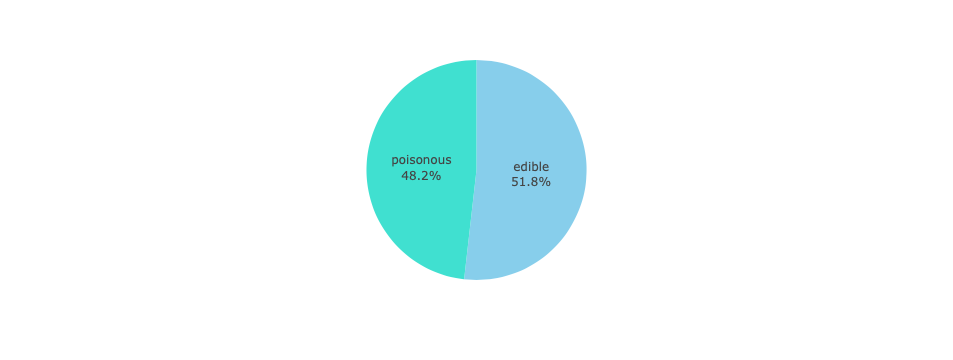

In [106]:
# pie chart of the target class
class_dict = df_mush['class'].value_counts().to_dict()
class_ordered = ['edible','poisonous']
change_dict_key(class_dict,list(class_dict.keys()),class_ordered)
df_class = series_to_df(class_dict,'Class')

fig = px.pie(df_class,values = 'Quantity',names = 'Class',color = 'Class',
            color_discrete_sequence = ['skyblue','turquoise'],width = 500)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=False)

fig.show()

Insight: We can see that we have a bit more edible mushrooms in our data than poisonous ones!

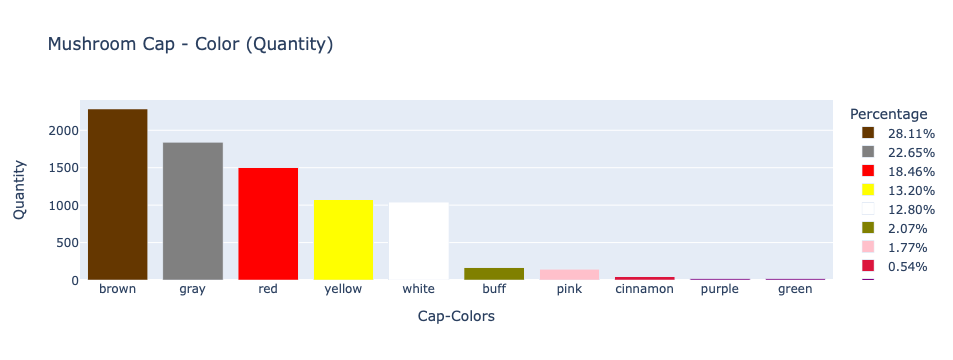

In [107]:
# plotting the frequency of the cap-color feature
cap_color_dict = df_mush['cap-color'].value_counts().to_dict()
cap_color_ordered = ['brown','gray','red','yellow','white','buff','pink','cinnamon','purple','green']
change_dict_key(cap_color_dict,list(cap_color_dict.keys()),cap_color_ordered)

colors = ['#653700','gray','red','yellow','white','olive','pink','crimson','purple','green']
df_cap_color = series_to_df(cap_color_dict,'Cap-Colors')

fig = px.bar(df_cap_color, x='Cap-Colors',y='Quantity',title = "Mushroom Cap - Color (Quantity)",
             color_discrete_sequence = colors,color = df_cap_color['Percentage'])
fig.show()

Majority of the mushrooms tend to be brown, gray, white, red and yellow in color within our dataset.

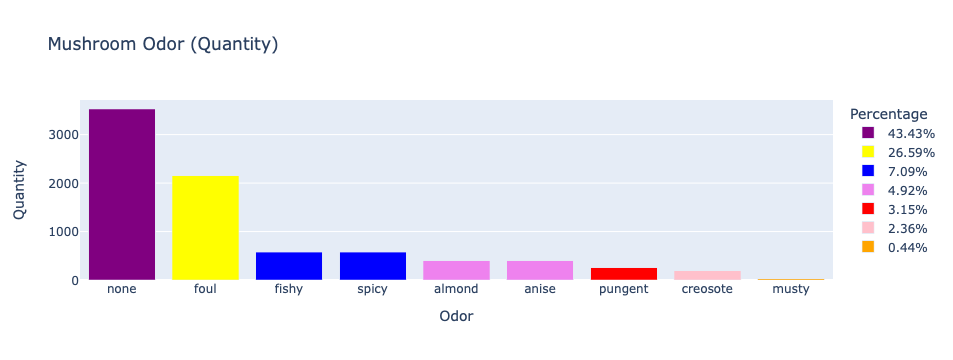

In [108]:
# plotting the frequency of the odor feature
odor_dict = df_mush['odor'].value_counts().to_dict()
odor_ordered = ['none','foul','fishy','spicy','almond','anise','pungent','creosote','musty']
change_dict_key(odor_dict,list(odor_dict.keys()),odor_ordered)
df_odor = series_to_df(odor_dict,'Odor')
colors = ['purple', 'yellow', 'blue', 'violet', 'red', 'pink', 'orange', 'black', 'green']

fig = px.bar(df_odor, x='Odor',y='Quantity',title = "Mushroom Odor (Quantity)",
             color_discrete_sequence = colors,color = df_odor['Percentage'],
            width=700, height=350)
fig.show()

Majority of the odor on the mushrooms in our data either has no smell or a foul, spicy one!

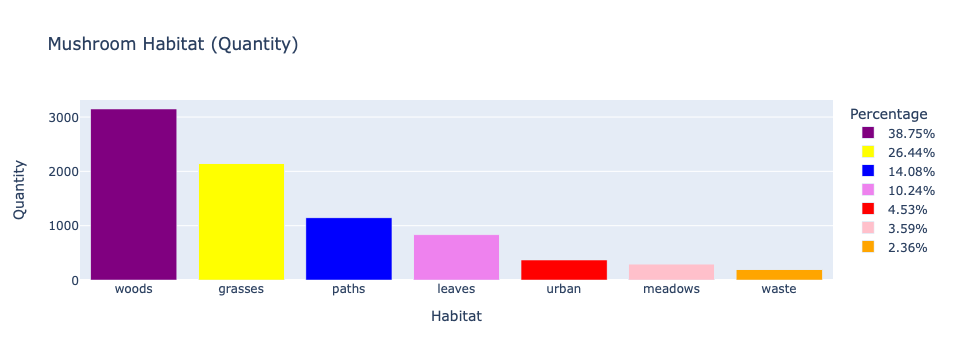

In [109]:
# plotting the frequency of the habitat attribute
habitat_dict = df_mush['habitat'].value_counts().to_dict()
habitat_ordered = ['woods','grasses','paths','leaves','urban','meadows','waste']
change_dict_key(habitat_dict,list(habitat_dict.keys()),habitat_ordered)
df_habitat = series_to_df(habitat_dict,'Habitat')

fig = px.bar(df_habitat, x='Habitat',y='Quantity',title = "Mushroom Habitat (Quantity)",
             color_discrete_sequence = colors,color = df_habitat['Percentage'])
fig.show()

Majority of the mushrooms habitat in the woods, grasses, leaves, or paths

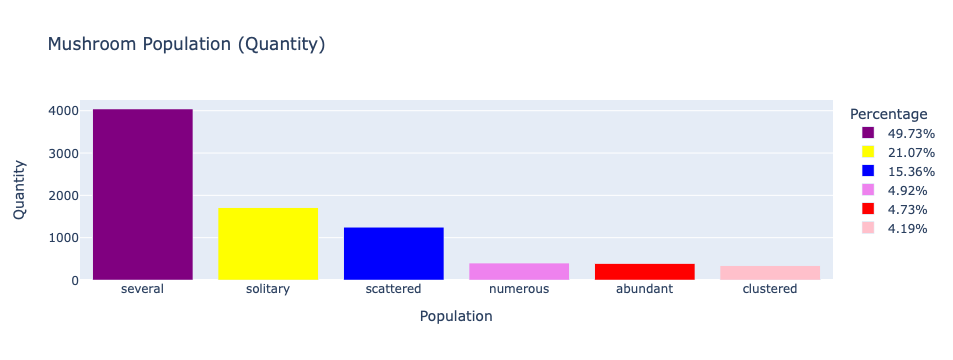

In [110]:
# plotting the frequency of the population feature
population_dict = df_mush['population'].value_counts().to_dict()
population_ordered = ['several','solitary','scattered','numerous','abundant','clustered']
change_dict_key(population_dict,list(population_dict.keys()),population_ordered)
df_population = series_to_df(population_dict,'Population')

fig = px.bar(df_population, x='Population',y='Quantity',title = "Mushroom Population (Quantity)",
             color_discrete_sequence = colors,color = df_population['Percentage'])
fig.show()

Majority of the mushrooms population tend to live in several, solitary, or scattered.

In [111]:
# list of features remaining
features = ['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing',
            'gill-size','gill-color','stalk-shape','stalk-surface-above-ring','stalk-surface-below-ring',
            'stalk-color-above-ring','stalk-color-below-ring','veil-color','ring-number',
            'ring-type','spore-print-color','population','habitat']
list(enumerate(features))

[(0, 'class'),
 (1, 'cap-shape'),
 (2, 'cap-surface'),
 (3, 'cap-color'),
 (4, 'bruises'),
 (5, 'odor'),
 (6, 'gill-attachment'),
 (7, 'gill-spacing'),
 (8, 'gill-size'),
 (9, 'gill-color'),
 (10, 'stalk-shape'),
 (11, 'stalk-surface-above-ring'),
 (12, 'stalk-surface-below-ring'),
 (13, 'stalk-color-above-ring'),
 (14, 'stalk-color-below-ring'),
 (15, 'veil-color'),
 (16, 'ring-number'),
 (17, 'ring-type'),
 (18, 'spore-print-color'),
 (19, 'population'),
 (20, 'habitat')]

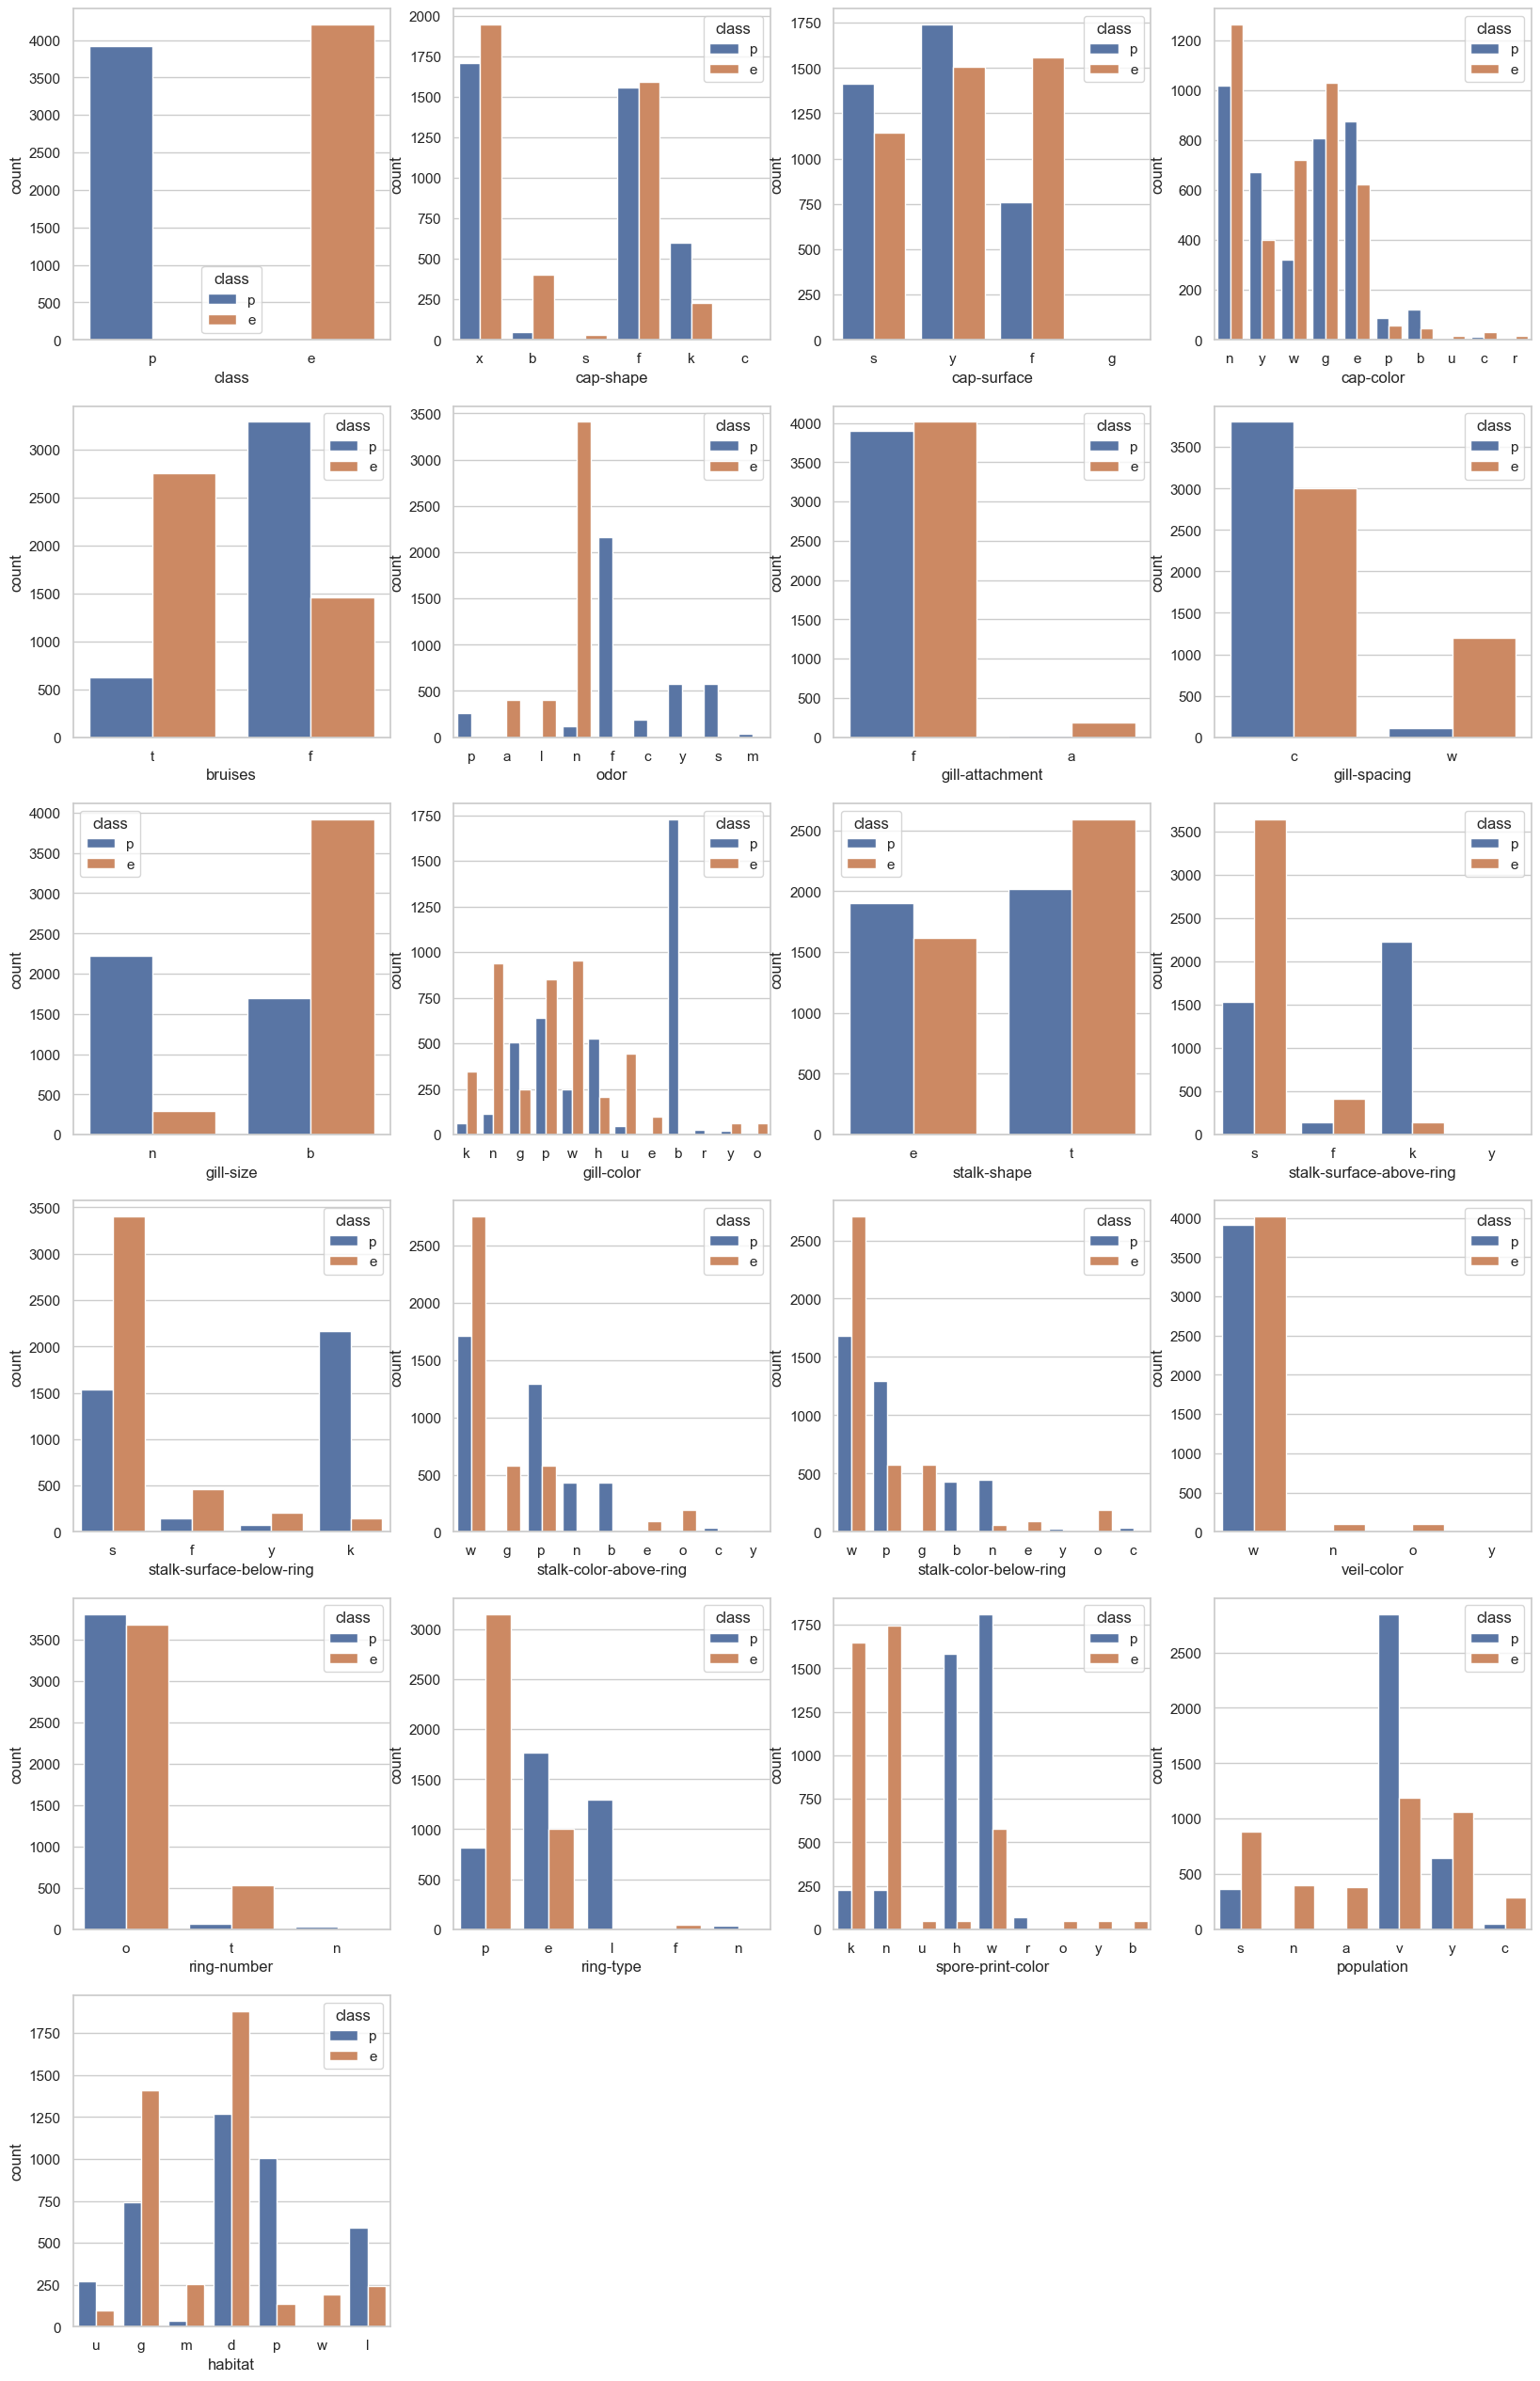

In [112]:
# Creates a graph for each column seperating the amount of edible and poisonous!
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,32))
for i in enumerate(features):
    plt.subplot(6,4,i[0]+1)
    sns.countplot(x = i[1], hue = 'class', data = df_mush)

We chose the best graphs that show a clear distinction between edible and poisonous mushrooms.

In [113]:
# function that turns a specific column into a data frame giving a count of edible and poisonous
def grouped_count_df(name_column):
    tidy = df_mush.groupby([name_column,'class']).size()
    df = tidy.to_frame(name = 'count').reset_index()
    return df

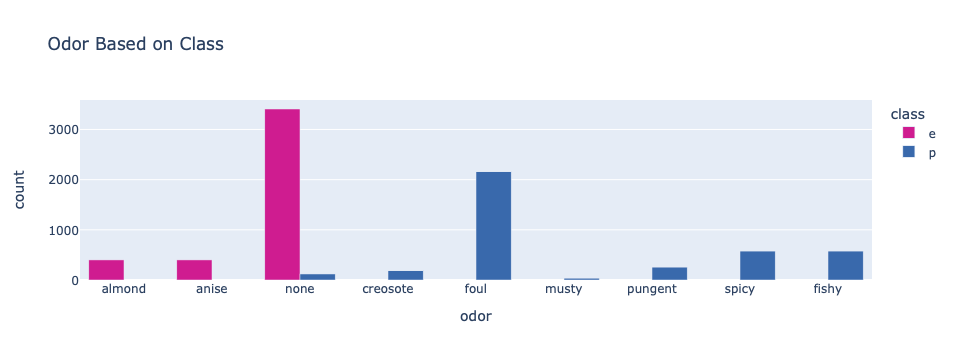

In [114]:
# bar chart for the Mushroom Odor feature
new_df = grouped_count_df('odor')

fig = px.bar(new_df,x='odor',y='count',color='class',color_discrete_sequence = ['rgb(207,28,144)','rgb(57,105,172)'],
              barmode='group', title = 'Odor Based on Class')

fig.update_layout(
        xaxis = dict(
        tickmode = 'array',
        tickvals = ['p','f','c','y','n','s','m','a','l'],         
        ticktext = ['pungent','foul','creosote','fishy','none','spicy','musty','almond','anise']
   )
 )

fig.show()

Observe: we can see a clear distinction between edible and poisonous mushrooms

Poisonous: we can see from above that if a mushroom has a foul, spicy or fishy smell then it is most likely to be a poisnonous one!

Edible: where as if a mushroom has no odor, almond, or anise smell then it is most likely an edible mushroom!

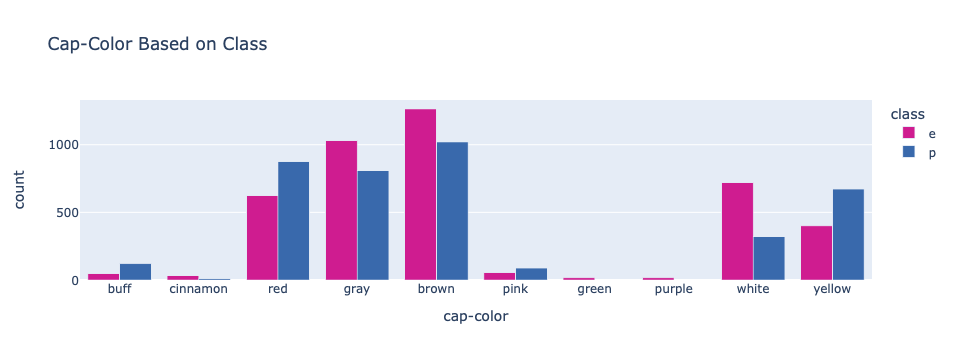

In [115]:
# bar chart on cap-color seperated by class
new_df = grouped_count_df('cap-color')

fig = px.bar(new_df,x='cap-color',y='count',color='class',color_discrete_sequence = ['rgb(207,28,144)','rgb(57,105,172)'],
              barmode='group', title = 'Cap-Color Based on Class')

fig.update_layout(
        xaxis = dict(
        tickmode = 'array',
        tickvals = ['b','c','e','g','n','p','r','u','w','y'],         
        ticktext = ['buff','cinnamon','red','gray','brown','pink','green','purple','white','yellow']
   )
 )

fig.show()

Poisonous: Similarly we can say that if a mushroom cap - color is red, yellow, pink, or buff then it most likely a poisonous one!

Edible: it is most likely edible if the cap-color is brown, grey or white.

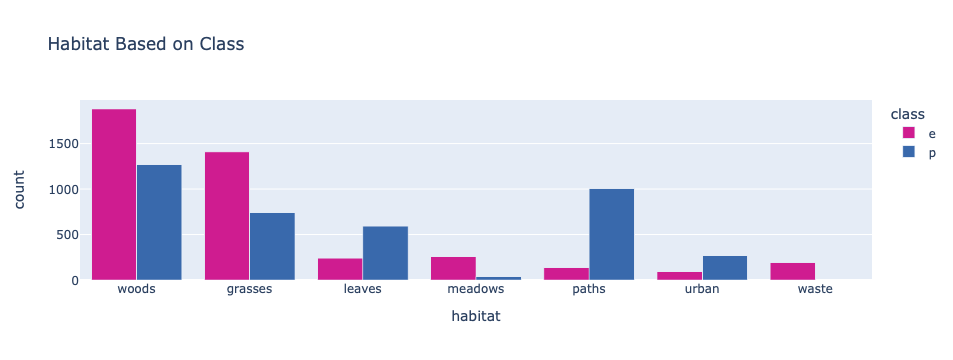

In [116]:
# bar chart on habitat seperated by class
new_df = grouped_count_df('habitat')

fig = px.bar(new_df,x='habitat',y='count',color='class',color_discrete_sequence = ['rgb(207,28,144)','rgb(57,105,172)'],
              barmode='group', title = 'Habitat Based on Class')

fig.update_layout(
        xaxis = dict(
        tickmode = 'array',
        tickvals = ['d','g','l','m','p','u','w'],         
        ticktext = ['woods','grasses','leaves','meadows','paths','urban','waste']
   )
 )

fig.show()

Poisnonous: most poisonous mushrooms tend to grow on paths, urban, or leaves .

Edible: most edible mushrooms tend to grow in the woods, grasses, or on meadows.

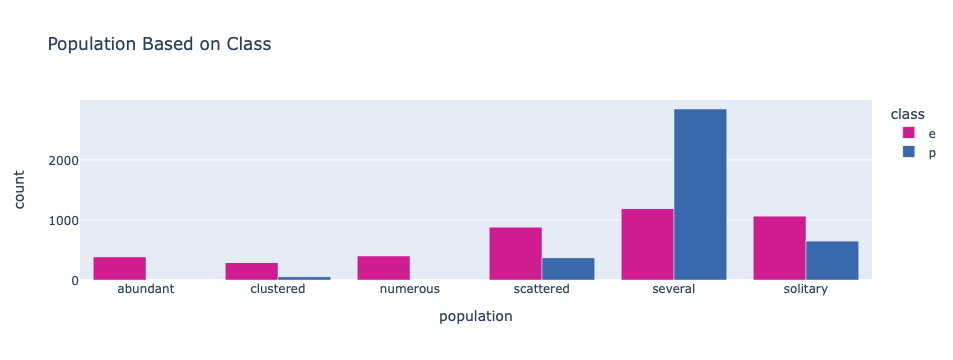

In [117]:
# bar chart on population seperated by class
new_df = grouped_count_df('population')

fig = px.bar(new_df,x='population',y='count',color='class',color_discrete_sequence = ['rgb(207,28,144)','rgb(57,105,172)'],
              barmode='group', title = 'Population Based on Class')

fig.update_layout(
        xaxis = dict(
        tickmode = 'array',
        tickvals = ['a','c','n','s','v','y'],         
        ticktext = ['abundant','clustered','numerous','scattered','several','solitary']
   )
 )

fig.show()

Poisonous: most poisonous mushroom population live with several other ones.

Edible: Where as edible mushrooms tend to be more abundant, clustered, numerous or mostly scattered.

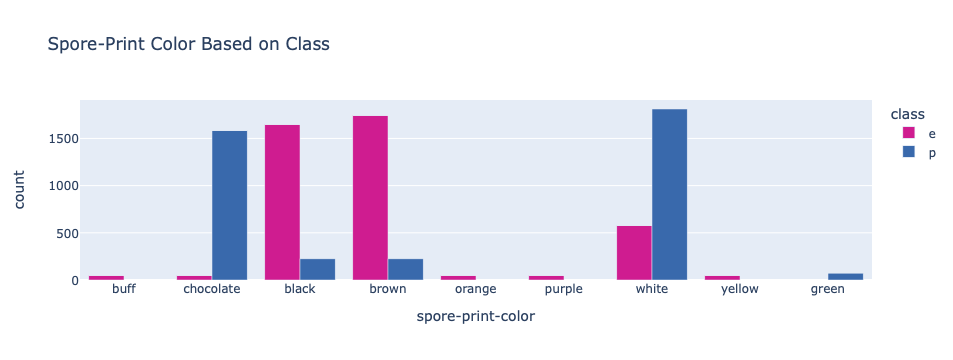

In [118]:
# bar chart on population seperated by class
new_df = grouped_count_df('spore-print-color')

fig = px.bar(new_df,x='spore-print-color',y='count',color='class',color_discrete_sequence = ['rgb(207,28,144)','rgb(57,105,172)'],
              barmode='group',title = 'Spore-Print Color Based on Class')

fig.update_layout(
        xaxis = dict(
        tickmode = 'array',
        tickvals = ['b','h','k','n','o','u','w','y','r'],         
        ticktext = ['buff','chocolate','black','brown','orange','purple','white','yellow','green']
   )
 )

fig.show()

Poisonous: Mostly chocolate, white, or green in spore-print color

Edible: Mostly black, brown, buff, orange, purple in spore-print color

## Total Insight: 

### Characteristic that can potentially describe an Edible Mushrooms

1. If a mushrooms odor has none, almond, or anise 
2. If the stalk color (above or below ring) is red, white, grey, or orange
3. If the population of the mushroom is either abundant, clusterd, numerous, scattered, or in solitary. 
4. If the mushrooms spore-print color is black, brown, buff, orange, or purple 
5. If the mushroom grows in the woods, grasses, or in the meadows.
6. If the mushrooms cap-color is brown, grey or white.
7. If the mushroom has bruises
8. If the mushroom has a gill - attached.
9. If the mushroom has a broad gill size
10. If the mushroom with ring type pendant or flaring

A combination of these types only increases the chance of it being an edible mushroom!

## Preprocessing for data modeling

In [119]:
# function to change categorical data to numerical 
from sklearn.preprocessing import LabelEncoder

In [120]:
# We turn the categorical data into numerical data 

# instantiate our Label Encoder
le = LabelEncoder()

# encoded dataframe
encoded_mush = df_mush.apply(le.fit_transform)

encoded_mush.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,2,2,7,7,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,0,2,2,7,7,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,0,2,2,7,7,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,0,2,2,7,7,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,0,2,2,7,7,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,0,2,2,7,7,2,1,4,2,3,3


In [121]:
# distribution of class
encoded_mush['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

Where:

0 denotes a edible mushroom 

1 denotes a poisonous mushroom

In [122]:
# check the Max on each column
encoded_mush.max()

class                        1
cap-shape                    5
cap-surface                  3
cap-color                    9
bruises                      1
odor                         8
gill-attachment              1
gill-spacing                 1
gill-size                    1
gill-color                  11
stalk-shape                  1
stalk-surface-above-ring     3
stalk-surface-below-ring     3
stalk-color-above-ring       8
stalk-color-below-ring       8
veil-color                   3
ring-number                  2
ring-type                    4
spore-print-color            8
population                   5
habitat                      6
dtype: int64

In [123]:
# statistical summary
# now that our categorical elements are encoded with numbers our summary output will be different
encoded_mush.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


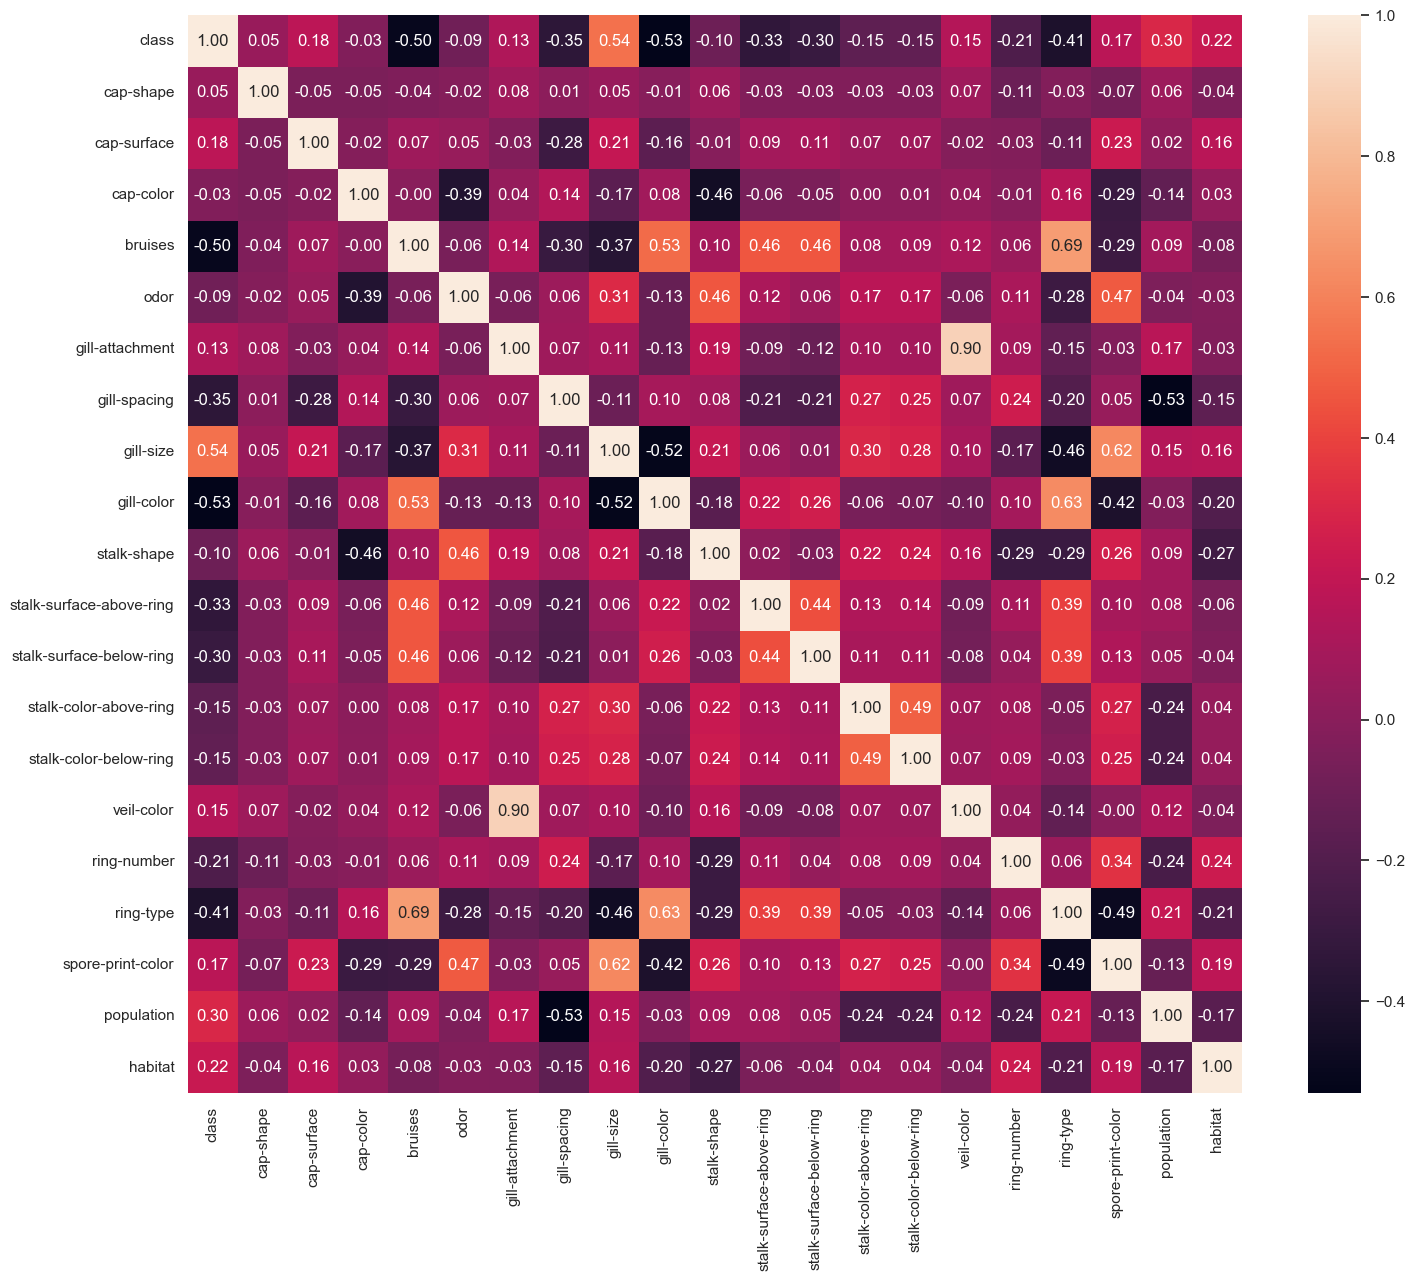

In [124]:
# uses the corr method from pandas to see how the variables are correlated
mush_corr = encoded_mush.corr()

# plots a heatmap on the correlation matrix
plt.figure(figsize=(17,14))

sns.heatmap(mush_corr, annot=True, fmt = '.2f')
plt.show()

From above we can see that the attributes that are most correlated with our target variable class are gill-size, gill-color, ring-type, bruises, population, and gill-spacing. Therefore, we must included these predictors in our model since they have strong influence on determining whether a mushroom is either poisonous or edible. 

In [125]:
# import train test split function
from sklearn.model_selection import train_test_split

In [126]:
# the method .values turns the column into a numpy array 
y = encoded_mush['class'].values
x = encoded_mush.drop(['class'],axis=1)

# split the data using a test size of 25 percent
x_mush_train,x_mush_test,y_mush_train,y_mush_test = train_test_split(x,y,random_state=42,test_size = 0.20)

In [127]:
# shape of x_train, y_train
x_mush_train.shape, y_mush_train.shape

((6499, 20), (6499,))

In [128]:
# shape of x_test, y_test
x_mush_test.shape, y_mush_test.shape

((1625, 20), (1625,))

In [129]:
# current shape of our dataframe
df_mush.shape

(8124, 21)

In [130]:
# to ensure Training/Test set are 75/25
6499/8124, 1625/8124

(0.7999753815854259, 0.2000246184145741)

In [131]:
# looking at x training data
x_mush_train.head(6)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7873,3,2,2,0,7,1,0,1,0,1,2,1,6,7,2,1,0,7,4,0
6515,5,2,4,0,2,1,0,1,0,1,1,2,7,7,2,1,0,7,4,4
6141,2,3,2,0,8,1,0,1,0,1,2,2,6,7,2,1,0,7,4,2
2764,2,0,4,1,5,1,0,0,9,1,2,2,3,6,2,1,4,3,4,0
438,0,3,9,1,3,1,0,0,4,0,2,2,7,7,2,1,4,3,2,3
5194,5,3,4,0,2,1,0,1,0,1,1,1,7,6,2,1,0,7,4,2


In [132]:
# training set for prediction
y_mush_train

array([1, 1, 1, ..., 0, 1, 0])

In [133]:
# to create a final report of the model scores
accuracy_report = {}
def add_report(model_name,model_score):
    accuracy_report[model_name]=model_score

# Data Modeling

## K Nearest Neighbors Classifier

In [134]:
from sklearn.neighbors import KNeighborsClassifier

The accuracy of KNN model for k=1 is: 99.93846153846154% 



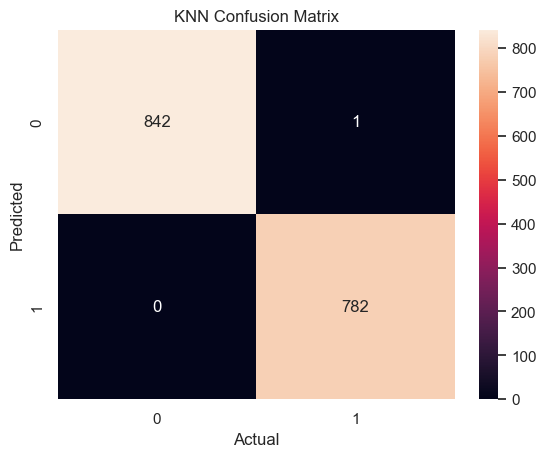

In [135]:
model_KNN_mush = KNeighborsClassifier(n_neighbors = 1)  
model_KNN_mush.fit(x_mush_train, y_mush_train)
predicted = model_KNN_mush.predict(x_mush_test)

# Confusion Matrix
KNN_matrix = confusion_matrix(y_mush_test, predicted)
sns.heatmap(KNN_matrix, annot=True, fmt="d")
plt.title('KNN Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')

print(f"The accuracy of KNN model for k=1 is: {accuracy_score(y_mush_test, predicted)*100}% \n")
add_report('KNN',accuracy_score(y_mush_test, predicted)*100)

Using Sklearn documentation on confusion matrix: 
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In our confusion matrix, the top left corner indicates the true negatives or in our specific case our the number of observations our KNN Classifier accurately predicted a edible mushroom to be edible. Next to the true negatives is the false positives. In this model we had a single false postive implying our model classified a single mushroom as being edible when it wasn't! Now in the bottom left corner of our confusion matrix, we have the false negatives, where it represents the amount of predicted mushrooms to be poisonous but they weren't. Our model classified none in the false negatives. Finally, in the bottom right corner we have the true positives, or the actual poisonous mushrooms predicted to be poisonous. 

In [136]:
# classification report
print(classification_report(y_mush_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



one of the parameters in our KNN Classifier is the number of nearest neighbors to classify an observation with. We try to find the most optimal k value for the KNN Classifier for our dataset, which is found to be 1 which is the initial k that we used.

Optimal K value is 1


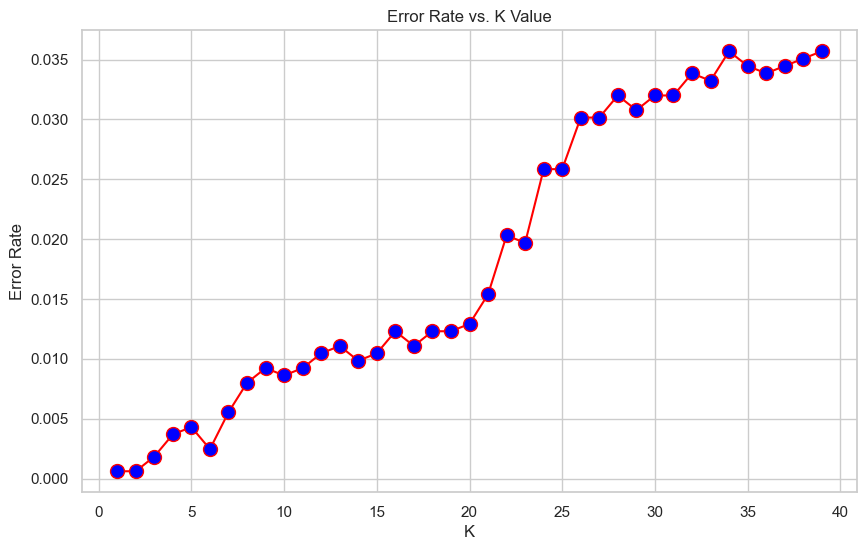

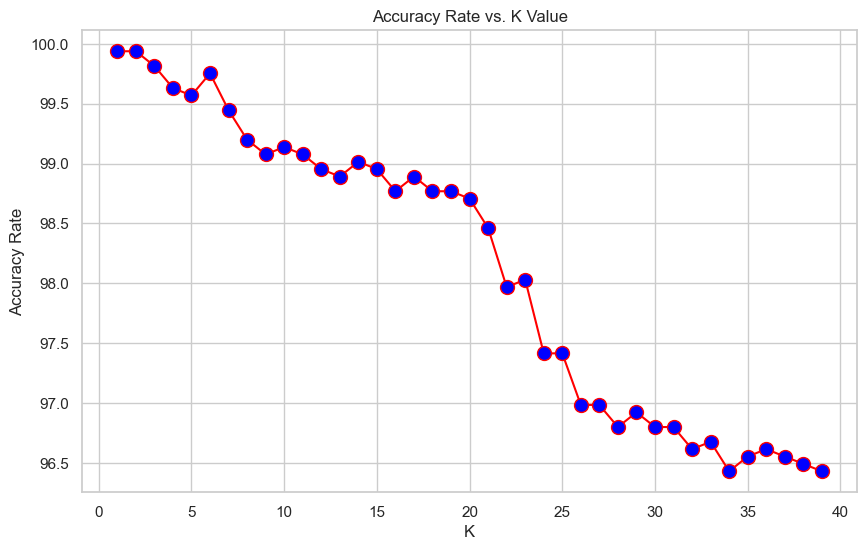

In [137]:
# checking for the optimal k-value for the KNN algorithm
error_rate = []
acc = []

for i in range(1,40):
    model_KNN_mush = KNeighborsClassifier(n_neighbors=i)
    model_KNN_mush.fit(x_mush_train, y_mush_train)
    pred_i = model_KNN_mush.predict(x_mush_test)
    error_rate.append(np.mean(pred_i != y_mush_test))
    acc.append(accuracy_score(y_mush_test, pred_i.round())*100)

    
# first Plot: Error Rate vs K value
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='red',
                linestyle ='solid', marker ='o',
         markerfacecolor ='blue', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# second Plot: Accuracy vs K value
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), acc, color ='red',
                linestyle ='solid', marker ='o',
         markerfacecolor ='blue', markersize = 10)
  
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')


# this is to find the optimal k value (index is offset by 1)
print("Optimal K value is", 1 + error_rate.index(min(error_rate)))

## Logistic Regression 

In [138]:
# import our Logistic Regression model
from sklearn.linear_model import LogisticRegression

The accuracy of Logistic Regression model is: 94.46153846153847% 



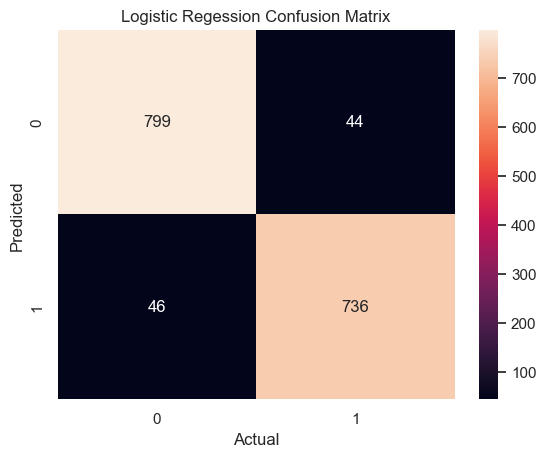

In [139]:
# instantiate our model
model_LOG_mush = LogisticRegression(max_iter=600)
model_LOG_mush.fit(x_mush_train, y_mush_train)
predicted = model_LOG_mush.predict(x_mush_test)

# Confusion Matrix
LOG_matrix = confusion_matrix(y_mush_test, predicted)
sns.heatmap(LOG_matrix, annot=True, fmt="d")
plt.title('Logistic Regession Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('Actual')

print(f"The accuracy of Logistic Regression model is: {accuracy_score(y_mush_test, predicted.round())*100}% \n")
add_report('Logistic Regression',accuracy_score(y_mush_test, predicted)*100)

In [140]:
# classification report on Logistic Regression
print(classification_report(y_mush_test, predicted))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.94      0.94       782

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



Logistic regression model works best for predicting a binary outcome which fits perfect for our data. However our accuracy score was 94.88% being slightly less than the KNN model. This is mostly likely an outcome of tuning a parameter in our model, for example, pherhaps changing the logistic regression model threshold, where by default it is set at 0.50

## Naives Bayes

In [141]:
# importing the three types of Naive Bayes
# each model has their own assumptions needed to be met
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB

Gaussian, Bernoulli, and Multinomial Naive Bayes are three commonly used variants of the Naive Bayes algorithm. Each variant has its own set of assumptions and strengths:

Gaussian Naive Bayes:

Assumptions:
-Assumes that the continuous features follow a Gaussian distribution.
-Assumes that the features are conditionally independent given the class.

Strengths:
-Performs well on data with continuous features.
-Efficient for high-dimensional data.

Bernoulli Naive Bayes:

Assumptions:
-Assumes that the features are binary or categorical.
-Assumes that the features are conditionally independent given the class.

Strengths:
-Performs well on text classification tasks.
-Handles sparse data well.

Multinomial Naive Bayes:

Assumptions:
-Assumes that the features are counts of occurrences of events (e.g., word counts).
-Assumes that the features are conditionally independent given the class.

Strengths:
-Performs well on text classification tasks.
-Handles sparse data well.
-Efficient for high-dimensional data.

Overall strengths of Naive Bayes:
-Fast and easy to implement.
-Works well with small training datasets.
-Handles high-dimensional data well.
-Performs well in multiclass classification problems.
-Can handle both continuous and categorical data.
-Can handle missing data using simple imputation methods.

However, Naive Bayes has some limitations as well. It assumes that the features are conditionally independent given the class, which may not be true in some cases. It also assumes that the prior probabilities of the classes are known, which may not be the case in real-world scenarios.

The accuracy of Gaussian Naives Bayes model is: 92.86153846153846% 



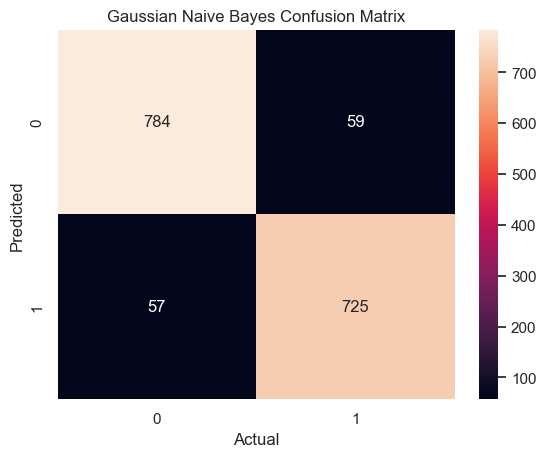

In [142]:
# instantiate our Gaussian Naive Bayes model
model_GaussianNB_mush = GaussianNB()
model_GaussianNB_mush.fit(x_mush_train, y_mush_train)
predicted = model_GaussianNB_mush.predict(x_mush_test)

# Confusion Matrix
GAUS_matrix = confusion_matrix(y_mush_test, predicted)
sns.heatmap(GAUS_matrix, annot=True, fmt="d")
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('Actual')

print(f"The accuracy of Gaussian Naives Bayes model is: {accuracy_score(y_mush_test, predicted.round())*100}% \n")
add_report('Gaussian Naive Bayes',accuracy_score(y_mush_test, predicted)*100)

In [143]:
# classification report on Gaussian Naive Bayes
print(classification_report(y_mush_test, predicted))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       843
           1       0.92      0.93      0.93       782

    accuracy                           0.93      1625
   macro avg       0.93      0.93      0.93      1625
weighted avg       0.93      0.93      0.93      1625



The accuracy of Bernoulli Naives Bayes model is: 87.2% 



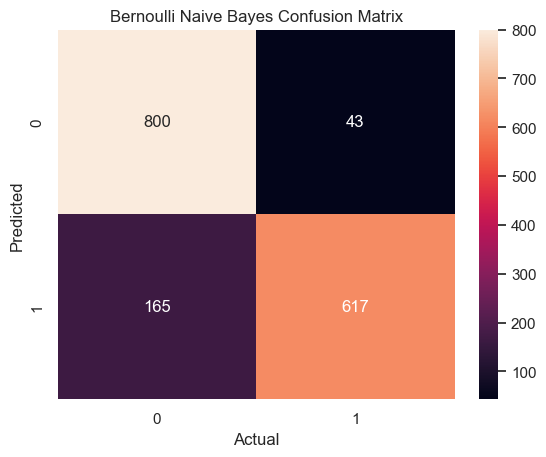

In [144]:
# instantiate our Bernoulli Naive Bayes
model_BernoulliNB_mush = BernoulliNB()
model_BernoulliNB_mush.fit(x_mush_train, y_mush_train)
predicted = model_BernoulliNB_mush.predict(x_mush_test)


# Confusion Matrix
BERN_matrix = confusion_matrix(y_mush_test, predicted)
sns.heatmap(BERN_matrix, annot=True, fmt="d")
plt.title('Bernoulli Naive Bayes Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('Actual')

print(f"The accuracy of Bernoulli Naives Bayes model is: {accuracy_score(y_mush_test, predicted.round())*100}% \n")
add_report('Bernoulli Naive Bayes',accuracy_score(y_mush_test, predicted)*100)

In [145]:
# classification report for Bernoulli Naive Bayes
print(classification_report(y_mush_test, predicted))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       843
           1       0.93      0.79      0.86       782

    accuracy                           0.87      1625
   macro avg       0.88      0.87      0.87      1625
weighted avg       0.88      0.87      0.87      1625



The accuracy of Multinomial Naives Bayes model is: 81.72307692307692% 



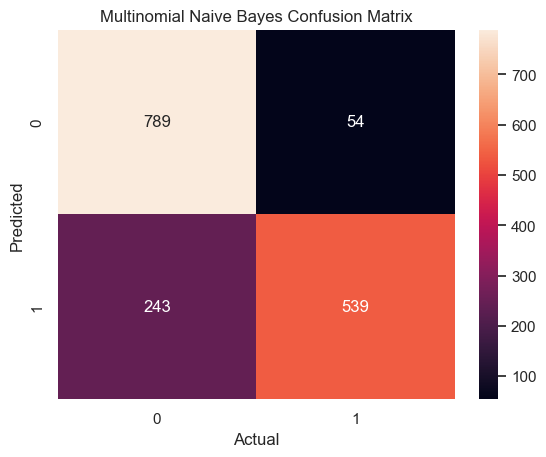

In [146]:
# instantiate our Multinomial Naive Bayes
model_MultinomialNB_mush = MultinomialNB()
model_MultinomialNB_mush.fit(x_mush_train, y_mush_train)
predicted = model_MultinomialNB_mush.predict(x_mush_test)

# confusion Matrix
MULT_matrix = confusion_matrix(y_mush_test, predicted)
sns.heatmap(MULT_matrix, annot=True, fmt="d")
plt.title('Multinomial Naive Bayes Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('Actual')

print(f"The accuracy of Multinomial Naives Bayes model is: {accuracy_score(y_mush_test, predicted.round())*100}% \n")
add_report('Multinomial Naive Bayes',accuracy_score(y_mush_test, predicted)*100)

In [147]:
# classification report for Multionomial Naive Bayes\
print(classification_report(y_mush_test, predicted))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       843
           1       0.91      0.69      0.78       782

    accuracy                           0.82      1625
   macro avg       0.84      0.81      0.81      1625
weighted avg       0.83      0.82      0.81      1625



Our next model we conducted was Naive Bayes, where it implements Bayes' Theorem to conduct the probabilities. Here we did three versions of Naive Bayes: Gaussian, Bernoulli, and Multinomial. Our highest score of the three was the Gaussian Naive bayes with a 92% accuracy score. Perhaps the reasoning why Gaussian Naive Bayes performed the best out of the three was that each column in our data can be approximated by a Normal(Gaussian) distribution.

## Support Vector Machine (SVM)

In [148]:
# import support vector classifier since we have a classification problem
from sklearn.svm import SVC

The accuracy of the Support Vector Machine model is: 99.26153846153845% 



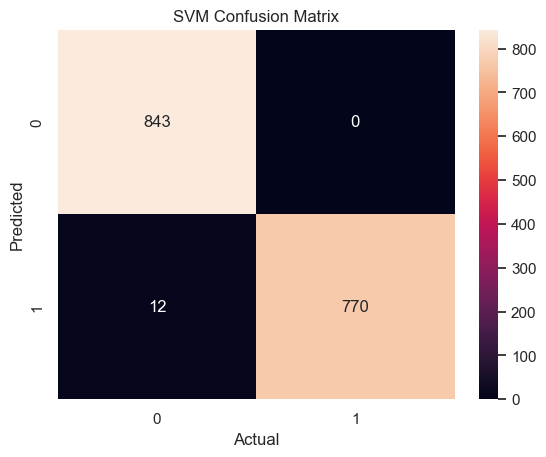

In [149]:
# instantiate our support vector classifier
model_SVM_mush = SVC()
model_SVM_mush.fit(x_mush_train, y_mush_train)
predicted = model_SVM_mush.predict(x_mush_test)

# confusion Matrix
SVM_matrix = confusion_matrix(y_mush_test, predicted)
sns.heatmap(SVM_matrix, annot=True, fmt="d")
plt.title('SVM Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('Actual')

print(f"The accuracy of the Support Vector Machine model is: {accuracy_score(y_mush_test, predicted.round())*100}% \n")
add_report('Support Vector Machine',accuracy_score(y_mush_test, predicted)*100)

In [150]:
# classification report on Support Vector Classifier
print(classification_report(y_mush_test, predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       843
           1       1.00      0.98      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



Our next model was Support Vector Machine with an accuracy score of 99.26% slightly less than our KNN model. The reasoning behind this is that SVM also separates the data kind of like KNN but uses a hyperplane as the separation. An example of a hyperplane in a 2-dimensional graph is a line and a plane in 3-dimensions. Showing the similarities between KNN and SVM.

## Random Forest 

In [151]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier

We run two different models of Random Forest which are Gini and Entropy, where the difference is how it calculates which node is best to go on top and which is the best next node.

The accuracy of the Gini Random Forest model is: 100.0% 



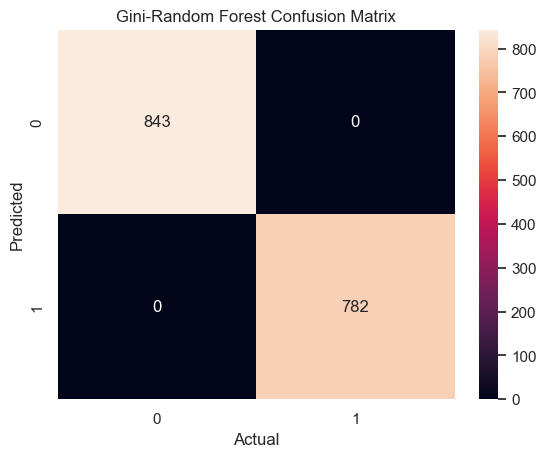

In [152]:
# Random Forest Classifier using Gini 
model_RF_Gini_mush = RandomForestClassifier(n_estimators = 100,criterion="gini",random_state = 4545,
                                            max_depth=100) 
model_RF_Gini_mush.fit(x_mush_train, y_mush_train)  
predicted = model_RF_Gini_mush.predict(x_mush_test)

# Confusion Matrix
FORE_matrix = confusion_matrix(y_mush_test, predicted)
sns.heatmap(FORE_matrix, annot=True, fmt="d")
plt.title('Gini-Random Forest Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('Actual')

print(f"The accuracy of the Gini Random Forest model is: {accuracy_score(y_mush_test, predicted.round())*100}% \n")
add_report('Gini Random Forest',accuracy_score(y_mush_test, predicted)*100)

In [153]:
# classification report with gini random forest classifier
print(classification_report(y_mush_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



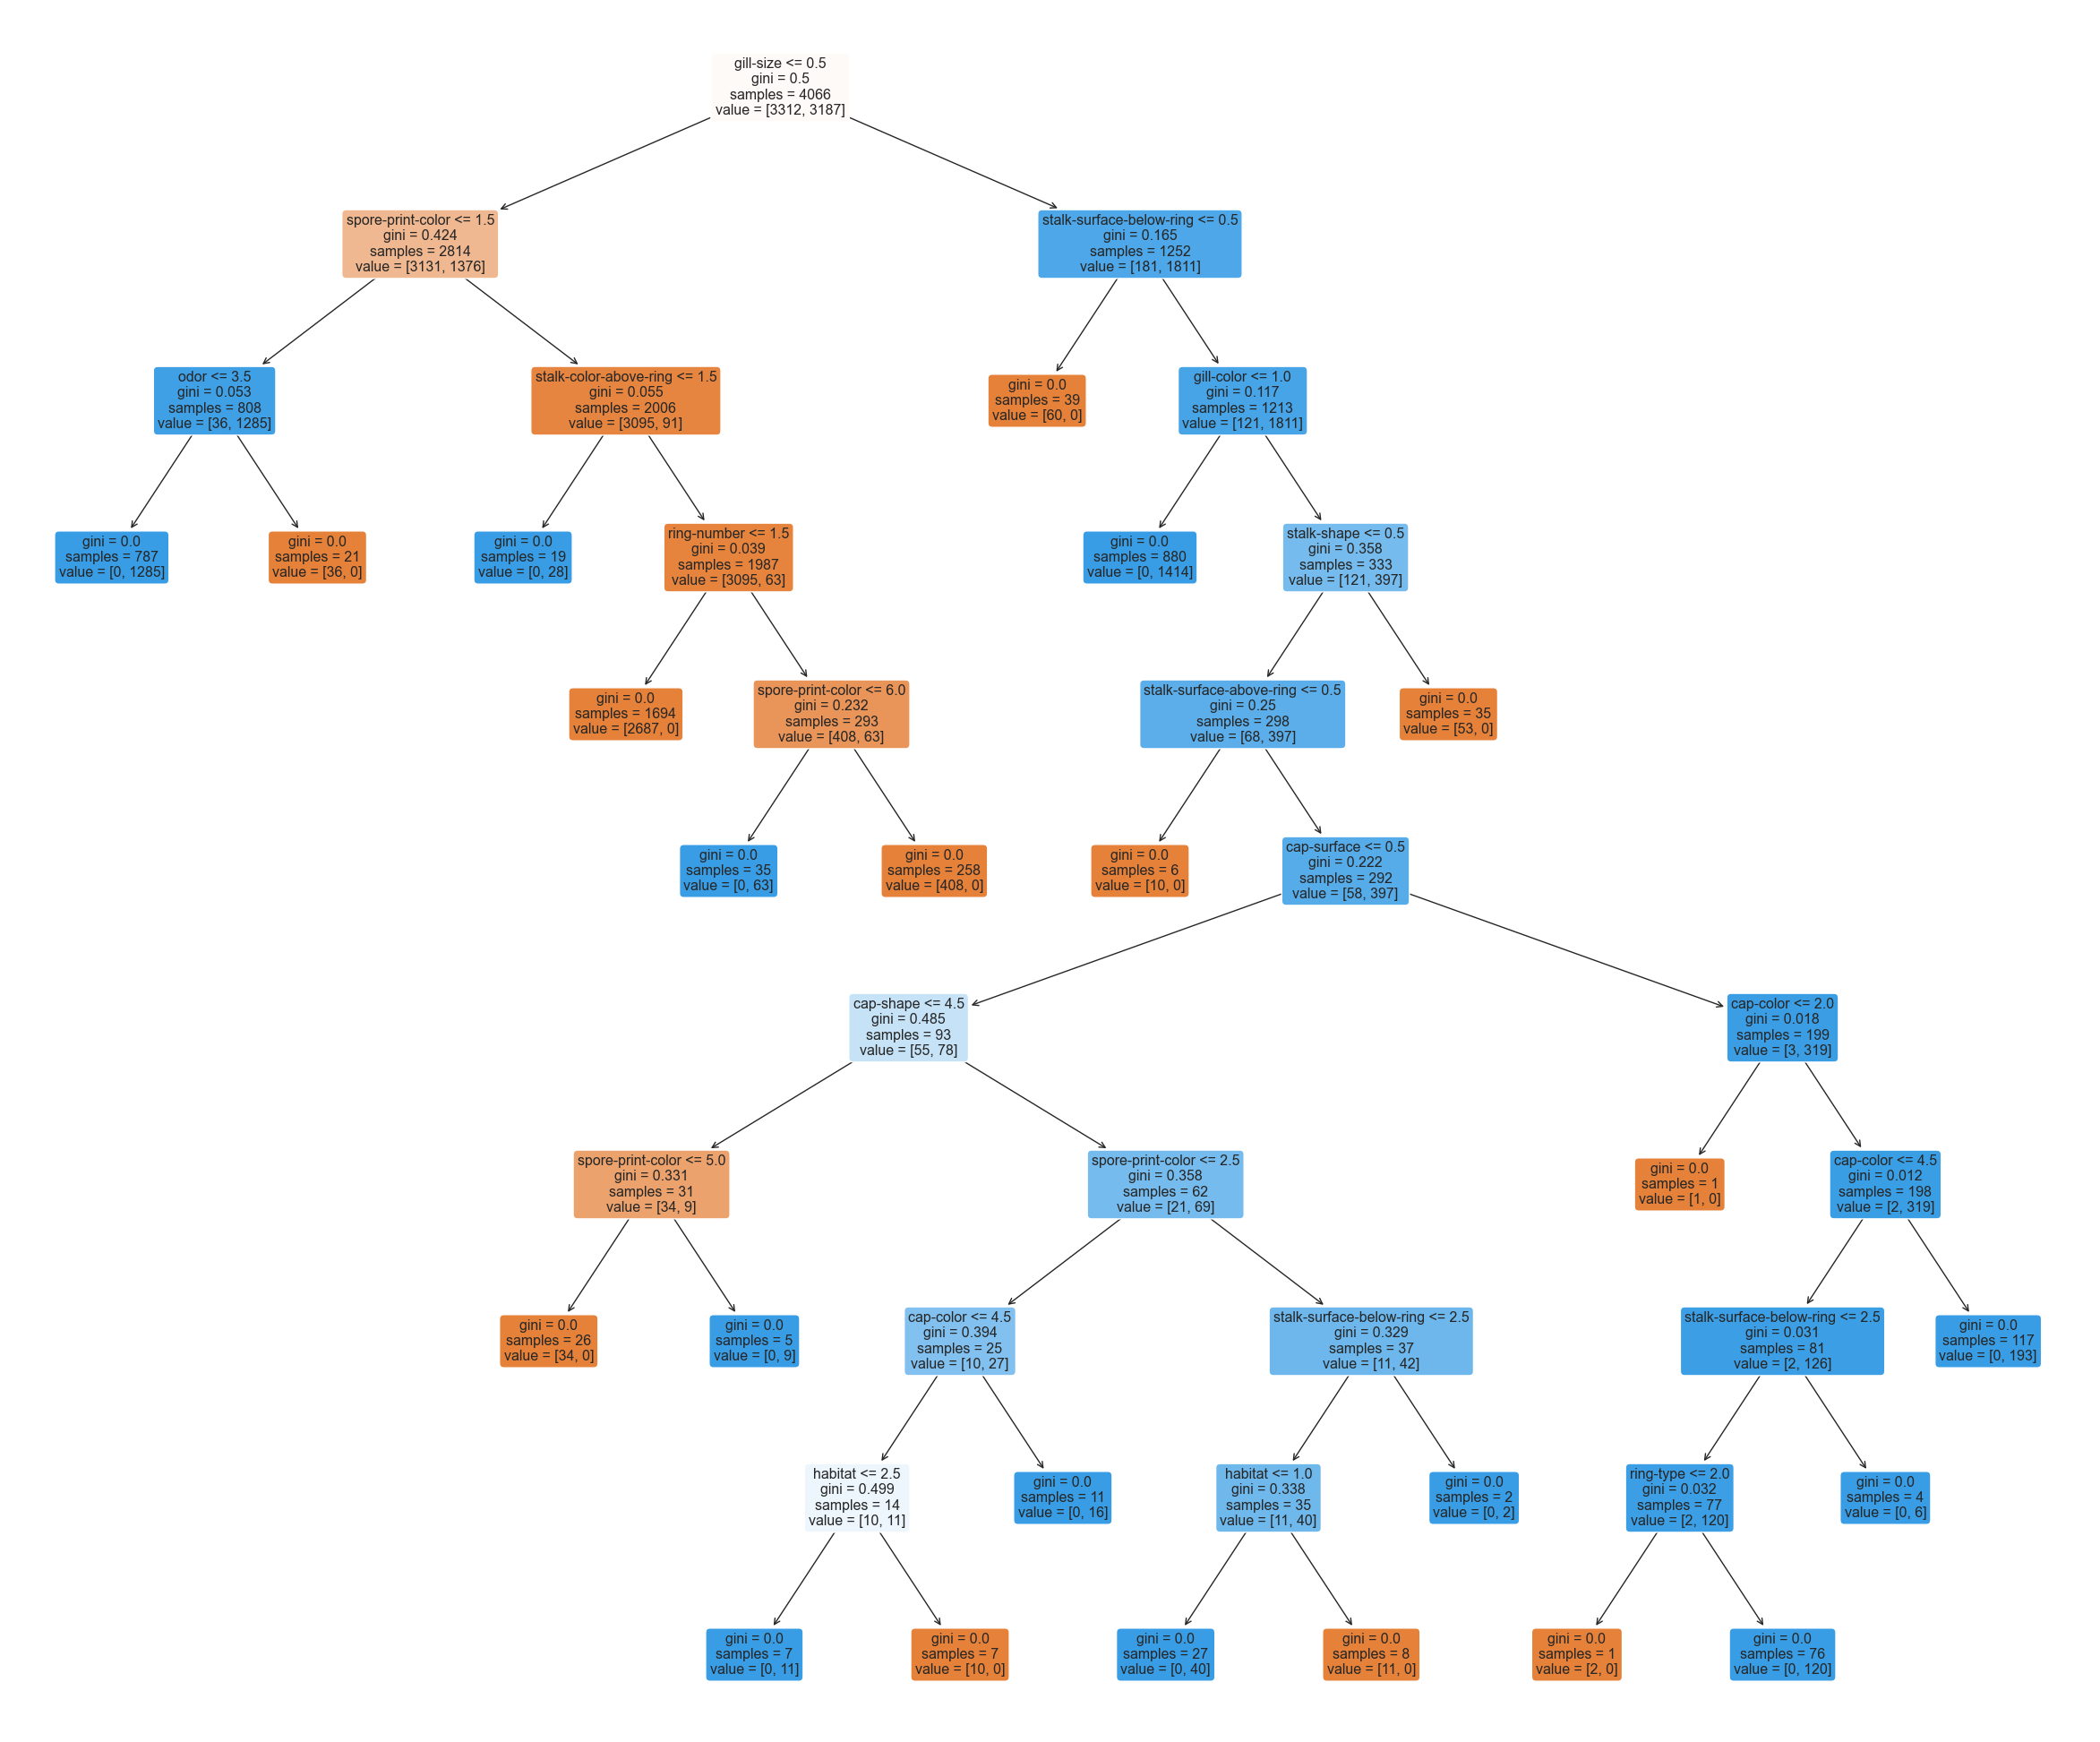

In [154]:
# import plot tree
# easiest way to plot a random forest tree
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(30,25))
plot_tree(model_RF_Gini_mush.estimators_[0], feature_names =  x.columns,
          filled=True, impurity=True, 
          rounded=True)
plt.show()

In [155]:
# save the plot tree above 

#fig.savefig('mush_giniRF.pdf')

The accuracy of the Entropy Random Forest model is: 100.0% 



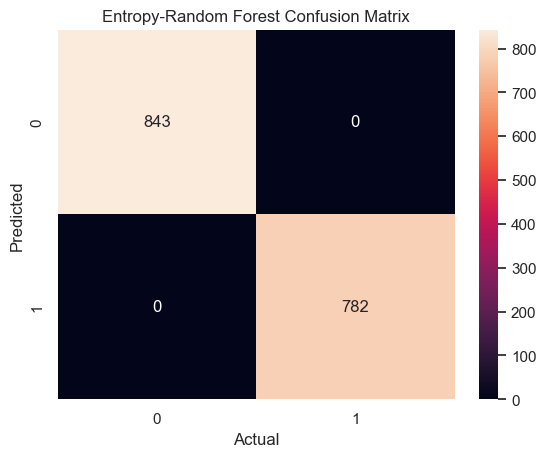

In [156]:
# Random Forest Classifier using Entropy
model_RF_Entropy_mush = RandomForestClassifier(n_estimators = 100,criterion="entropy",random_state = 4646,
                                                max_depth=100) 
model_RF_Entropy_mush.fit(x_mush_train, y_mush_train)  
predicted = model_RF_Entropy_mush.predict(x_mush_test)


# Confusion Matrix
FORE_matrix = confusion_matrix(y_mush_test, predicted)
sns.heatmap(FORE_matrix, annot=True, fmt="d")
plt.title('Entropy-Random Forest Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('Actual')

print(f"The accuracy of the Entropy Random Forest model is: {accuracy_score(y_mush_test, predicted.round())*100}% \n")
add_report('Entropy Random Forest',accuracy_score(y_mush_test, predicted)*100)

In [157]:
# classification report for entropy random forest classifier
print(classification_report(y_mush_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



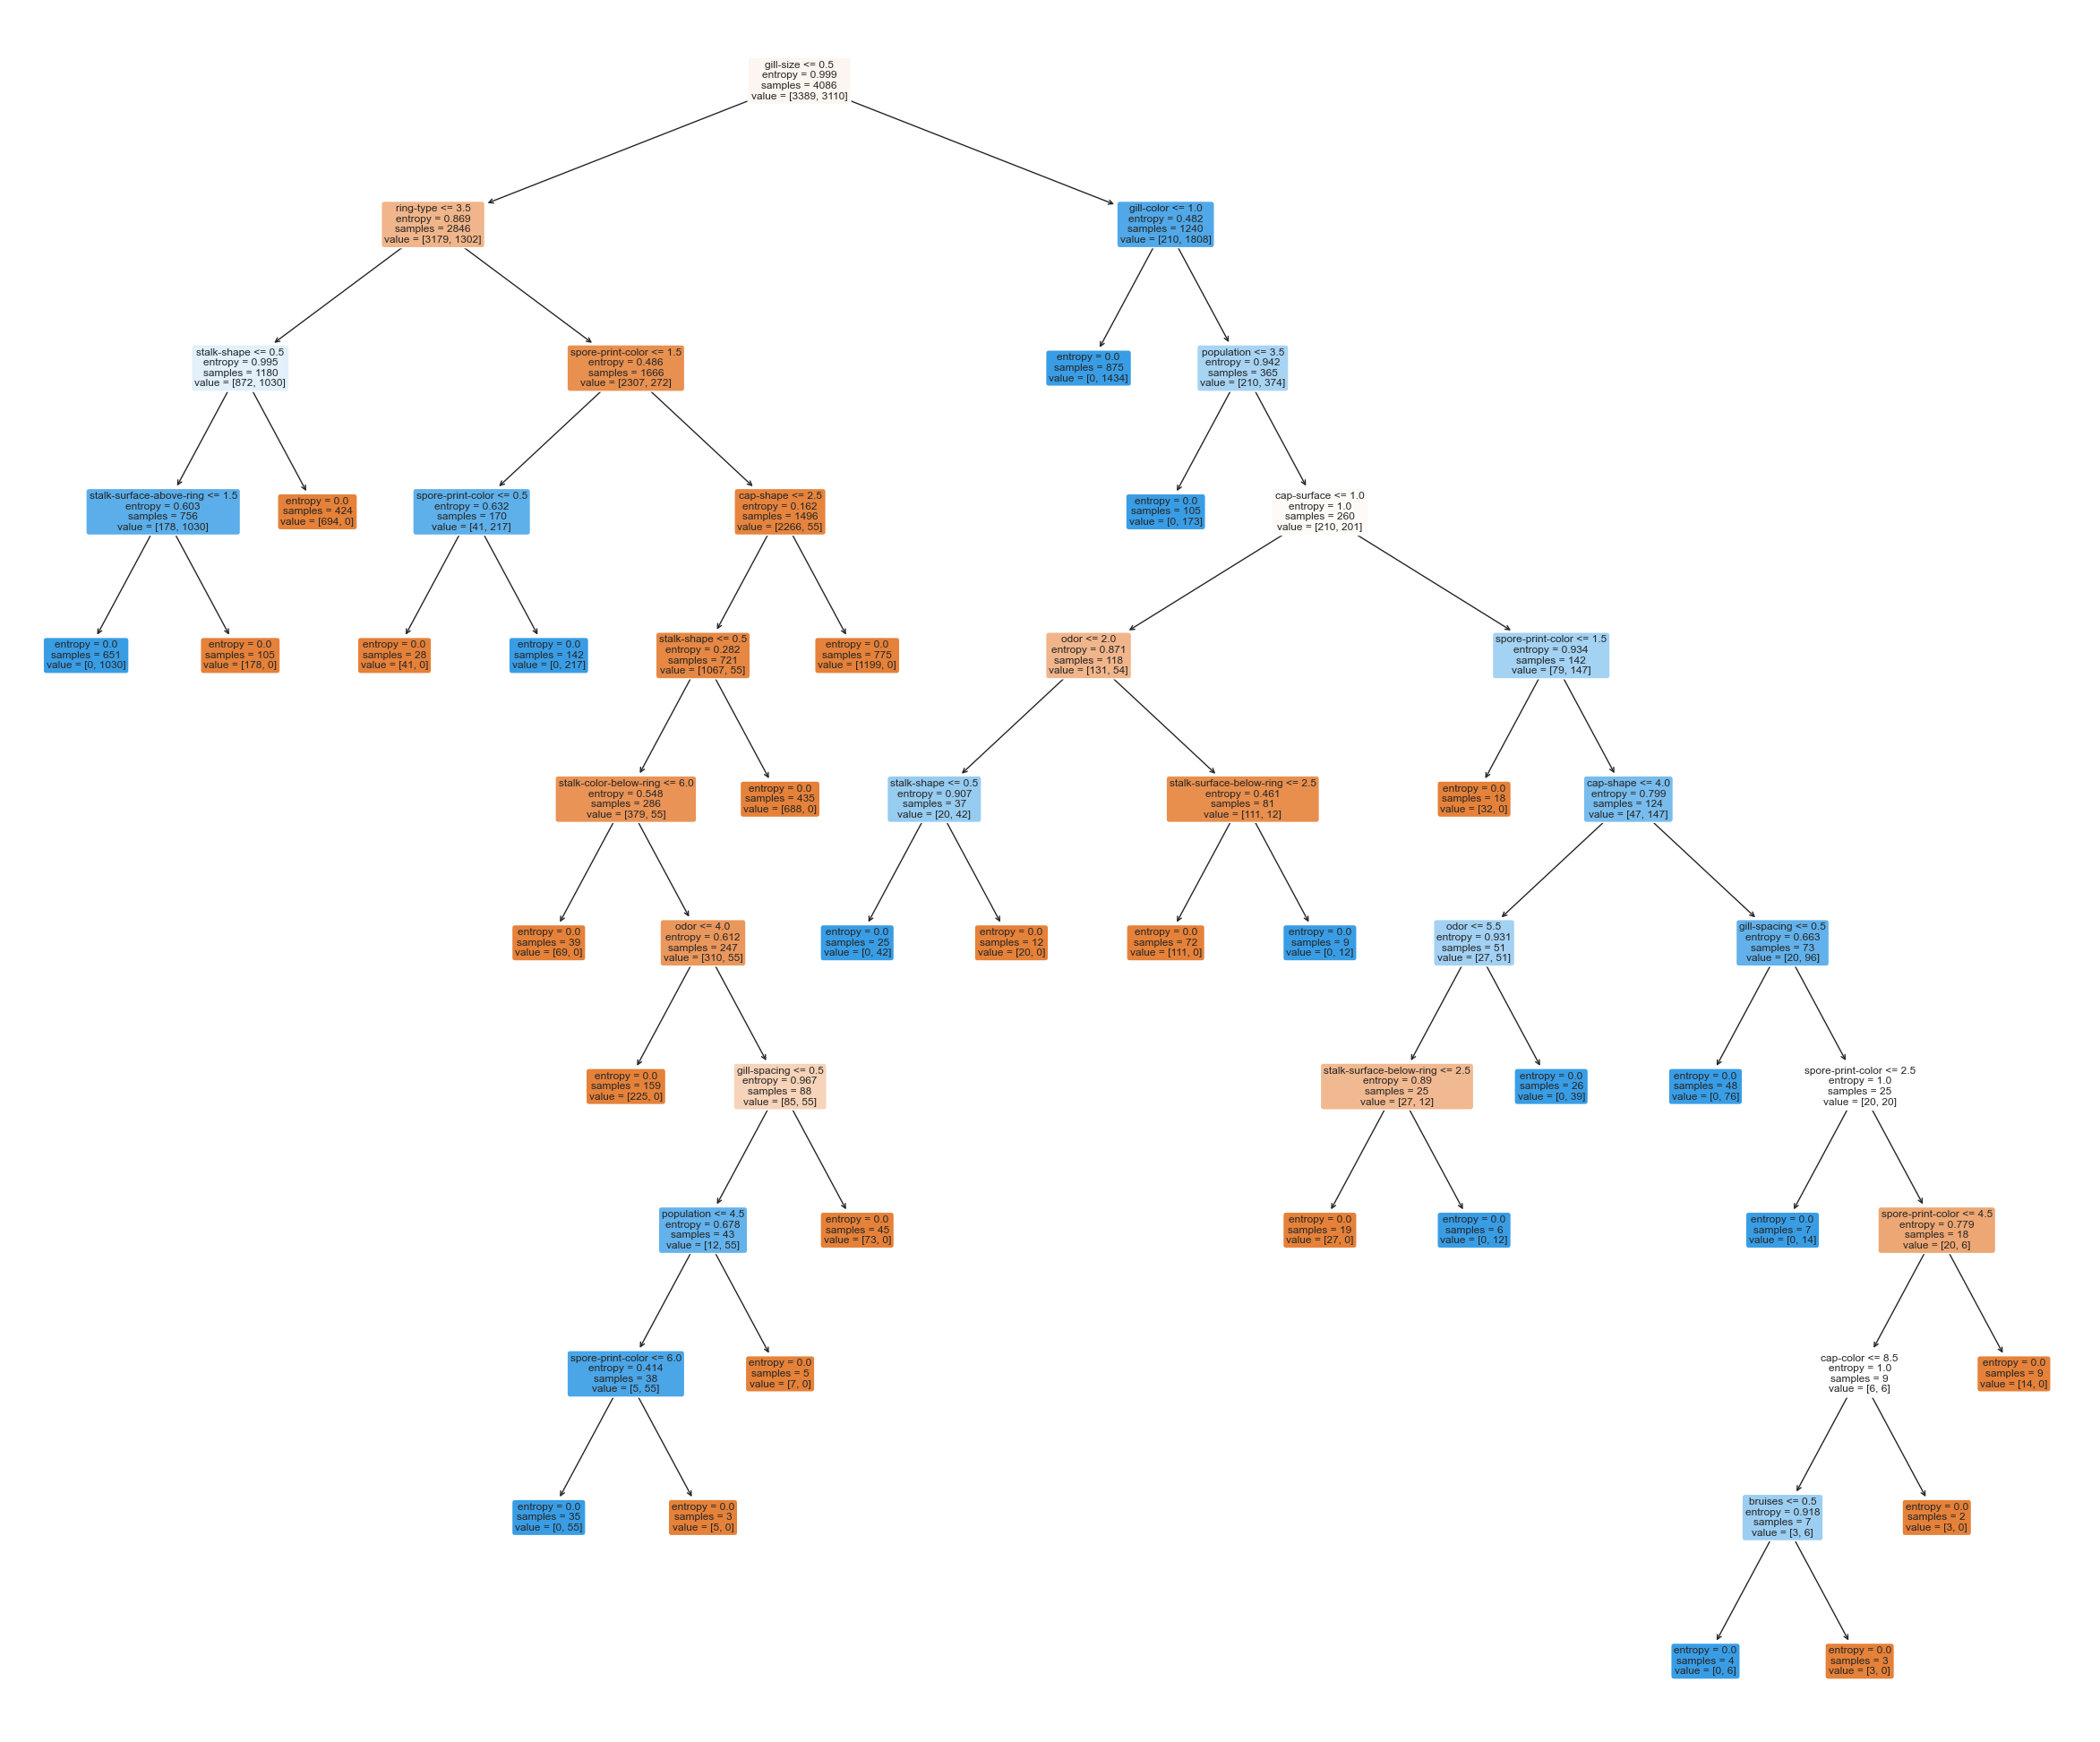

In [158]:
# plot entropy tree
fig = plt.figure(figsize=(30,25))
plot_tree(model_RF_Entropy_mush.estimators_[0], 
          filled=True, impurity=True, feature_names =  x.columns,
          rounded=True)
plt.show()

In [159]:
# save the entropy tree

# fig.savefig('mush_entropyRF.pdf')

Now our most optimal model was Random Forest bringing an accuracy score of 100%. It was able to classify a mushroom being edible or poisonous based our data with no errors! A random forest is just a composition of many decisions trees, now to choose which node goes on the very top has many techniques in doing so. We used two different methods here being Gini and Entropy.

## Conclusion 

In [160]:
# Highest score to lowest score
accuracy_scores = {k: v for k, v in sorted(accuracy_report.items(), key=lambda item: item[1],reverse = True)}
accuracy_scores

{'Gini Random Forest': 100.0,
 'Entropy Random Forest': 100.0,
 'KNN': 99.93846153846154,
 'Support Vector Machine': 99.26153846153845,
 'Logistic Regression': 94.46153846153847,
 'Gaussian Naive Bayes': 92.86153846153846,
 'Bernoulli Naive Bayes': 87.2,
 'Multinomial Naive Bayes': 81.72307692307692}

Both Gini and Entropy Random Forest had the greatest accuracy score in predicting our testing data set. While K-Nearest Neighbors and Support Vector Machine also gave a good accuracy to classify our mushrooms!

### What could have we done better?

1. Perform a cross validation test, which is separating the train and test data into several different subsets (called k-folds) to get a more accurate representation on our testing set.
2. Also gathering more samples in our data, which will give a more accurate representation of our classification problem.
3. Also we used a good amount of features for our predictors in our models, perhaps we used too many features where some predictors might have contributing little to none in predicting the class of a mushroom. 